In [ ]:
%pip install optuna
%pip install catboost
%pip install lightgbm
%pip install xgboost

In [ ]:
import pandas as pd
import pickle

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import optuna
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, classification_report
optuna.logging.set_verbosity(optuna.logging.ERROR)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
import random

In [ ]:
#data = pd.read_csv('C:/Users/HP/Pictures/agithub/data/processed/processed_scaling/test_data_attrition_scaling.csv')
data = pd.read_csv('/content/test_data_attrition_scaling.csv')
X = data.drop('Attrition', axis=1)
y = data['Attrition']


In [ ]:
path = '/content/model/'
#path = 'C:/Users/HP/Pictures/agithub/src/models/'

In [ ]:
models = ['LogisticRegression_model.pkl',
         'random_forest_model.pkl',
         'svc_model.pkl',
         'xgboost_model.pkl',
         'lightgbm_model.pkl',
         'catboost_model.pkl'
         ]
dict_model = {'LogisticRegression_model.pkl':"Logistic Regression",
         'random_forest_model.pkl':"Random Forest",
         'svc_model.pkl':"Support Vector Machine",
         'xgboost_model.pkl':'XGBoost',
         'lightgbm_model.pkl':"LightGBM",
         'catboost_model.pkl':"CatBoost"
}

Validation Logistic Regression model

Final evaluation on test set:
F1 Score: 0.3913
Recall: 0.4615
Precision: 0.3396
ROC AUC Score: 0.7410

Detailed Classification Report:
              precision    recall  f1-score   support

           0      0.913     0.863     0.887       255
           1      0.340     0.462     0.391        39

    accuracy                          0.810       294
   macro avg      0.626     0.662     0.639       294
weighted avg      0.837     0.810     0.821       294



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.5.0 when using version 1.6.1. This might lead to breaking code or in

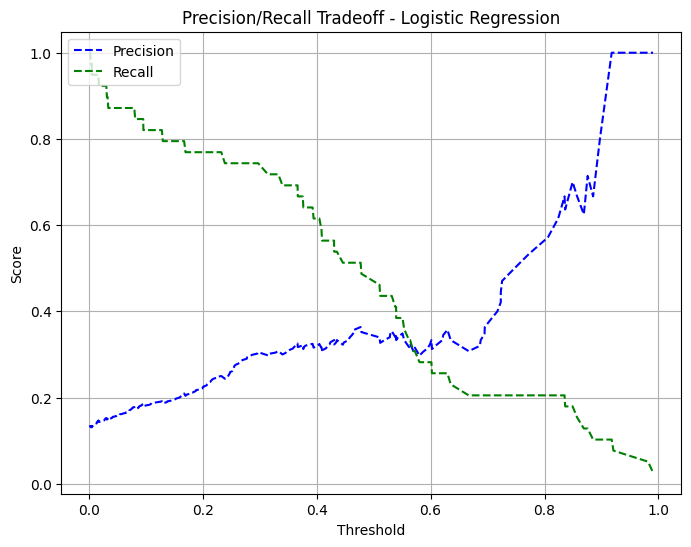

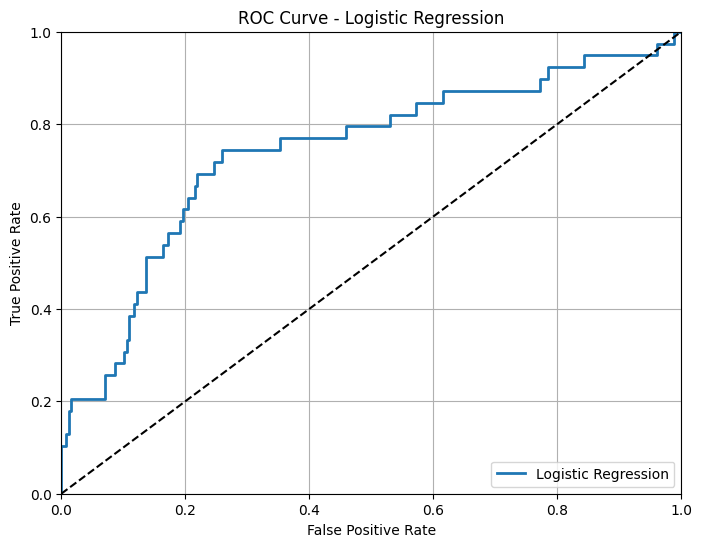

Validation Support Vector Machine model

Final evaluation on test set:
F1 Score: 0.2264
Recall: 0.1538
Precision: 0.4286
ROC AUC Score: 0.7337

Detailed Classification Report:
              precision    recall  f1-score   support

           0      0.882     0.969     0.923       255
           1      0.429     0.154     0.226        39

    accuracy                          0.861       294
   macro avg      0.655     0.561     0.575       294
weighted avg      0.822     0.861     0.831       294



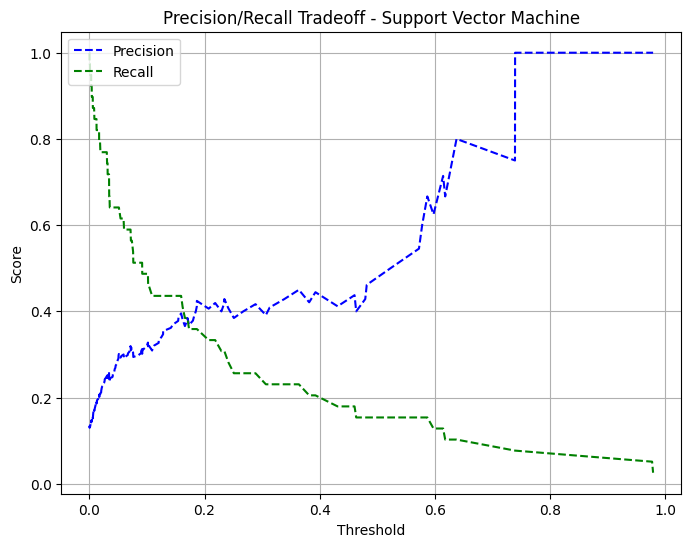

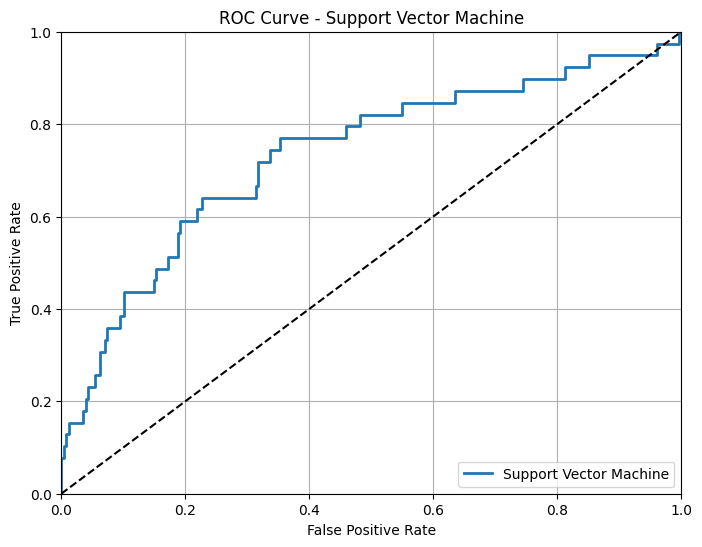

Validation XGBoost model

Final evaluation on test set:


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


F1 Score: 0.3780
Recall: 0.6154
Precision: 0.2727
ROC AUC Score: 0.7556

Detailed Classification Report:
              precision    recall  f1-score   support

           0      0.927     0.749     0.829       255
           1      0.273     0.615     0.378        39

    accuracy                          0.731       294
   macro avg      0.600     0.682     0.603       294
weighted avg      0.840     0.731     0.769       294



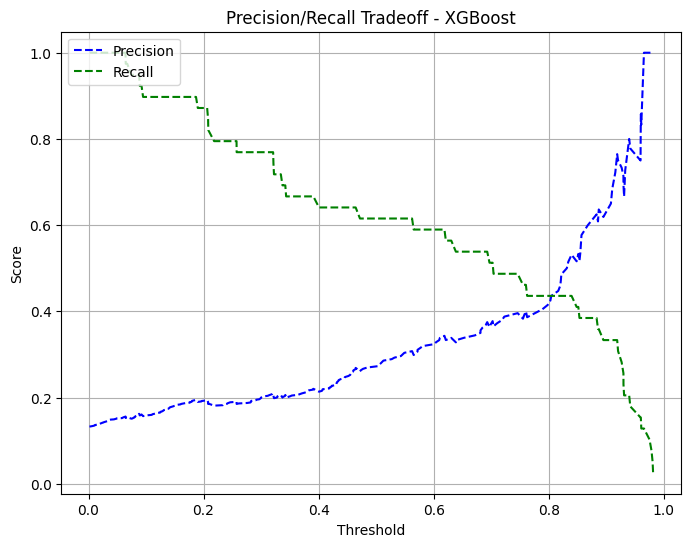

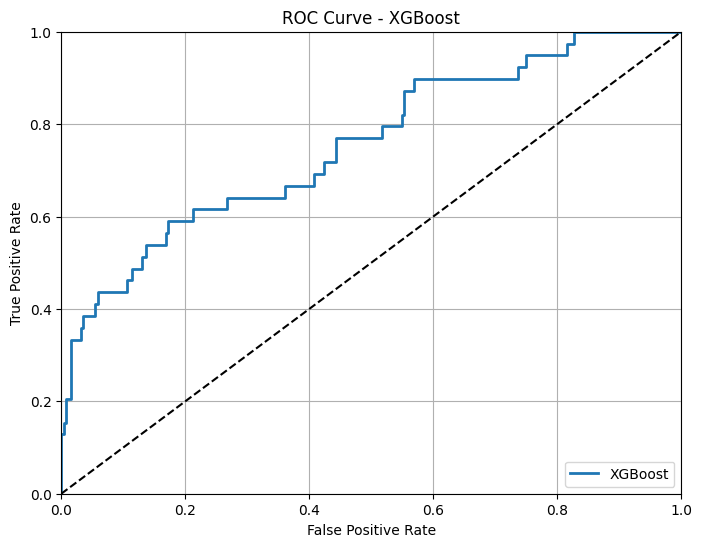

Validation LightGBM model

Final evaluation on test set:
F1 Score: 0.3385
Recall: 0.5641
Precision: 0.2418
ROC AUC Score: 0.7091

Detailed Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


              precision    recall  f1-score   support

           0      0.916     0.729     0.812       255
           1      0.242     0.564     0.338        39

    accuracy                          0.707       294
   macro avg      0.579     0.647     0.575       294
weighted avg      0.827     0.707     0.749       294



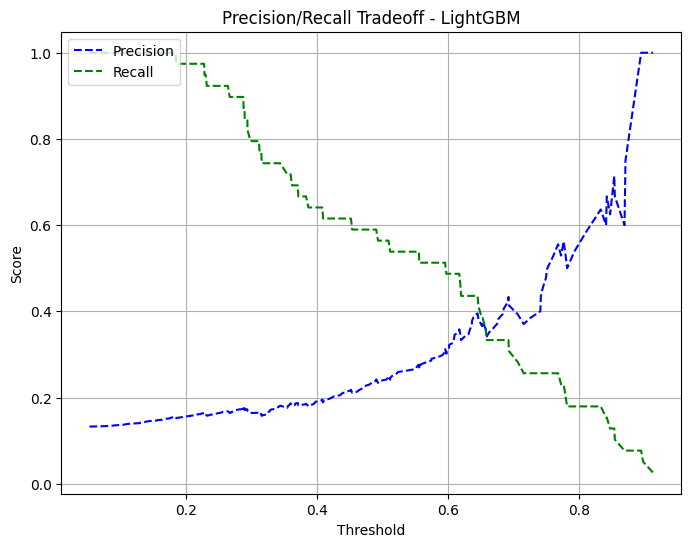

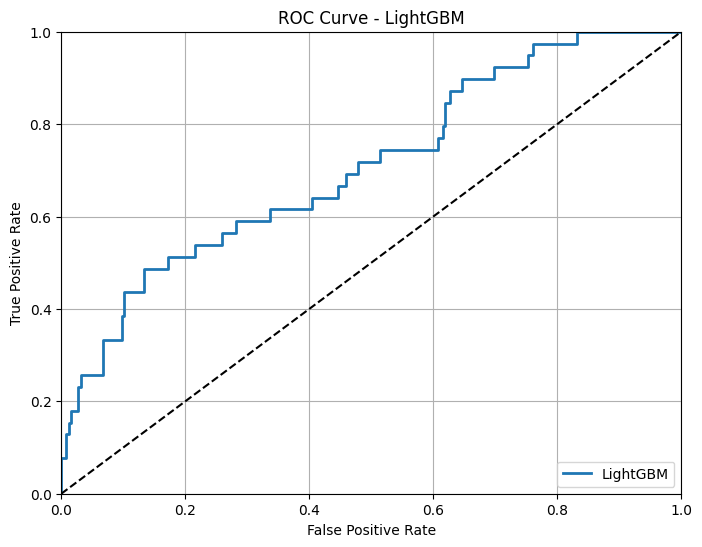

Validation CatBoost model

Final evaluation on test set:
F1 Score: 0.4098
Recall: 0.6410
Precision: 0.3012
ROC AUC Score: 0.7116

Detailed Classification Report:
              precision    recall  f1-score   support

           0      0.934     0.773     0.845       255
           1      0.301     0.641     0.410        39

    accuracy                          0.755       294
   macro avg      0.617     0.707     0.628       294
weighted avg      0.850     0.755     0.788       294



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


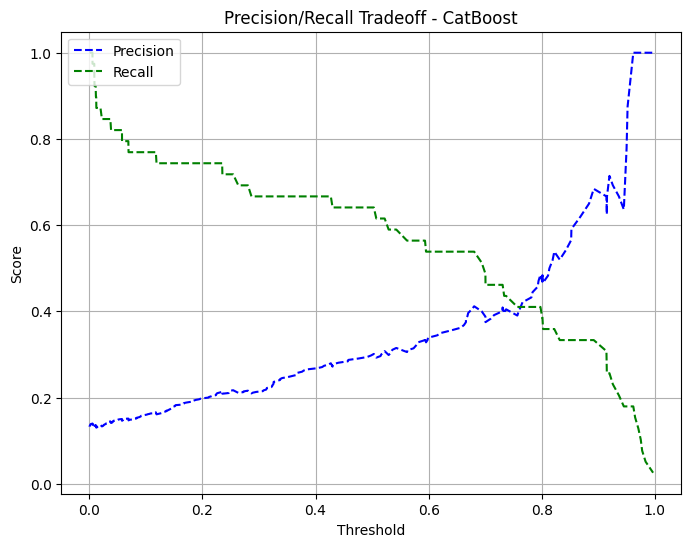

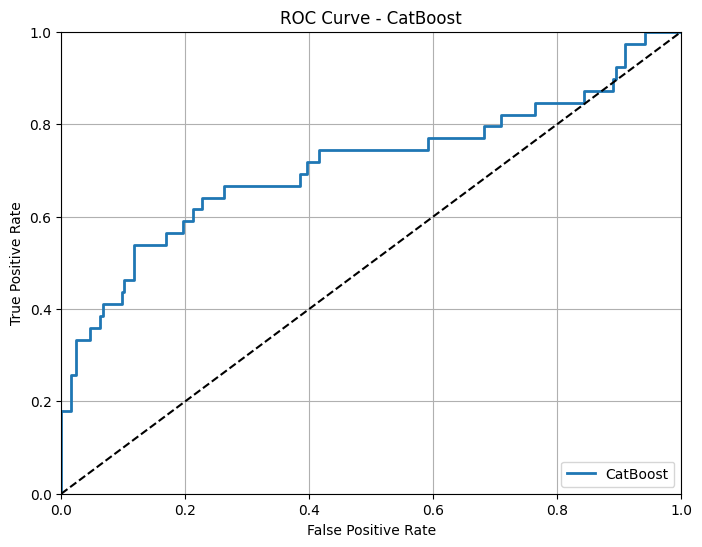

In [ ]:
for m in models:
    print(f"Validation {dict_model[m]} model")
    with open(path + m, 'rb') as f:
        model = pickle.load(f)
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    print("\nFinal evaluation on test set:")
    print(f"F1 Score: {f1_score(y, y_pred):.4f}")
    print(f"Recall: {recall_score(y, y_pred):.4f}")
    print(f"Precision: {precision_score(y, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y, y_pred_proba):.4f}")
    print("\nDetailed Classification Report:")
    print(classification_report(y, y_pred, digits=3))
    precisions, recalls, thresholds = precision_recall_curve(y, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend(loc="upper left")
    plt.title(f"Precision/Recall Tradeoff - {dict_model[m]}")
    plt.grid(True)
    plt.show()
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=f"{dict_model[m]}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dict_model[m]}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()